In [1]:
import torch
import matplotlib.pyplot as plt

In [53]:
K = 1000
N = 128
B = 2000
P = torch.randn(B, K, N).to('cuda')
x = torch.randn(B, N).to('cuda')

In [54]:
dt = 0.001
beta = 5.0
for step in range(10000):
    y = torch.matmul(P, x.unsqueeze(-1)).squeeze(-1)
    p = torch.softmax(beta * y, dim=-1)
    v = torch.matmul(P.transpose(-2, -1), p.unsqueeze(-1)).squeeze(-1) - x
    x += dt * v
    if step % 1000 == 0:
        print(f"Step {step}: mean x = {x.mean().item():.4f}")

Step 0: mean x = 0.0015
Step 1000: mean x = 0.0024
Step 2000: mean x = 0.0027
Step 3000: mean x = 0.0029
Step 4000: mean x = 0.0029
Step 5000: mean x = 0.0029
Step 6000: mean x = 0.0029
Step 7000: mean x = 0.0029
Step 8000: mean x = 0.0029
Step 9000: mean x = 0.0029


In [55]:
G = torch.matmul(P, P.transpose(-2, -1))

In [56]:
vals, vecs = torch.linalg.eigh(G)

In [57]:
m = torch.matmul(P, x.unsqueeze(-1)).squeeze(-1)/N

In [58]:
m_vs_eigv = torch.matmul(vecs.transpose(-2, -1), m.unsqueeze(-1)).squeeze(-1)/torch.linalg.norm(m, dim=-1, keepdim=True)

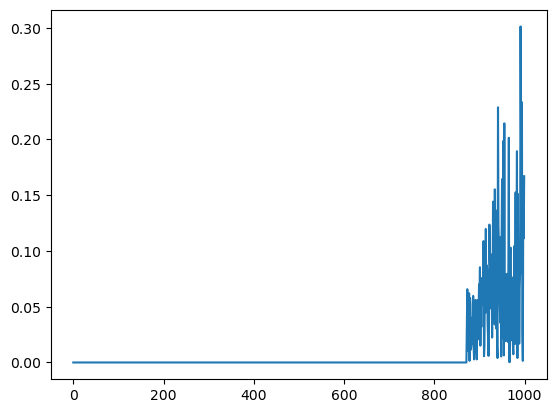

In [60]:
plt.plot(m_vs_eigv[1].abs().cpu().numpy())
plt.show()

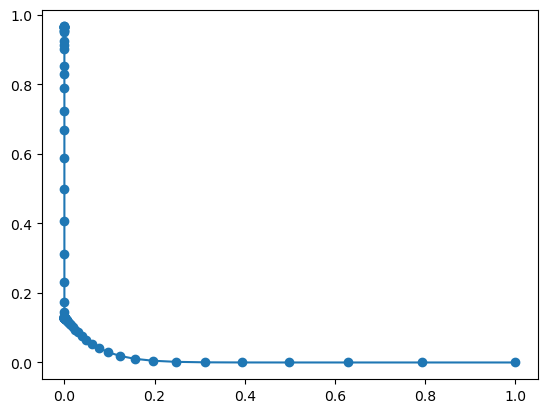

In [51]:
eps = torch.logspace(-10, 0, steps=100).to('cuda')
plt.plot(eps.cpu().numpy(), (m_vs_eigv.abs()[None, ...] > eps[:,None,None]).float().mean(dim=(1,2)).cpu().numpy(), marker='o')
plt.show()

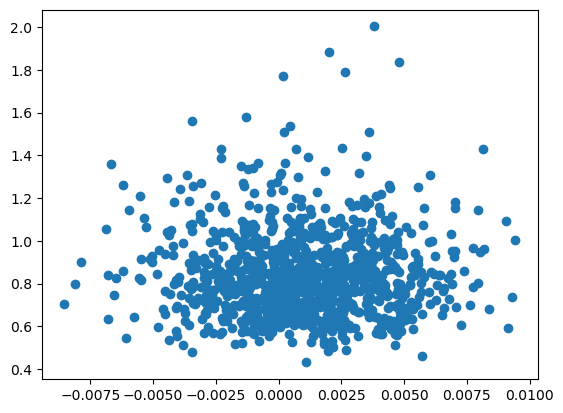

In [29]:
plt.scatter( torch.mean(m, dim=-1).cpu().numpy(), torch.max(m_vs_eigv, dim=-1).values.cpu().numpy())
plt.show()